In [71]:
# Jun Tu 21-732-722
# Guanda Zhao 21-716-345

In [72]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import networkx as nx
import networkx.algorithms.community as com
import random

colour = ["black","silver","gray","white","maroon","red","purple","fuchsia","green","lime","olive","yellow","navy","blue","teal","aqua","aliceblue","antiquewhite","aqua","aquamarine","azure","beige","bisque","black","blanchedalmond","blue","blueviolet","brown","burlywood","cadetblue","chartreuse","chocolate","coral","cornflowerblue","cornsilk","crimson","cyan","darkblue","darkcyan","darkgoldenrod","darkgray","darkgreen","darkgrey","darkkhaki","darkmagenta","darkolivegreen","darkorange","darkorchid","darkred","darksalmon","darkseagreen","darkslateblue","darkslategray","darkslategrey","darkturquoise","darkviolet","deeppink","deepskyblue","dimgray","dimgrey","dodgerblue","firebrick","floralwhite","forestgreen","fuchsia","gainsboro","ghostwhite","gold","goldenrod","gray","green","greenyellow","grey","honeydew","hotpink","indianred","indigo","ivory","khaki","lavender","lavenderblush","lawngreen","lemonchiffon","lightblue","lightcoral","lightcyan","lightgoldenrodyellow","lightgray","lightgreen","lightgrey","lightpink","lightsalmon","lightseagreen","lightskyblue","lightslategray","lightslategrey","lightsteelblue","lightyellow","lime","limegreen","linen","magenta","maroon","mediumaquamarine","mediumblue","mediumorchid","mediumpurple","mediumseagreen","mediumslateblue","mediumspringgreen","mediumturquoise","mediumvioletred","midnightblue","mintcream","mistyrose","moccasin","navajowhite","navy","oldlace","olive","olivedrab","orange","orangered","orchid","palegoldenrod","palegreen","paleturquoise","palevioletred","papayawhip","peachpuff","peru","pink","plum","powderblue","purple","red","rosybrown","royalblue","saddlebrown","salmon","sandybrown","seagreen","seashell","sienna","silver","skyblue","slateblue","slategray","slategrey","snow","springgreen","steelblue","tan","teal","thistle","tomato","turquoise","violet","wheat","white","whitesmoke","yellow","yellowgreen"]
random.shuffle(colour)

In [73]:
### Load Graphs
data_base_path = "Data/"
data_rnd_base_path = "Data Random/"

G_karate = nx.read_gml(data_base_path + "graph_karate.gml")
G_karate_rnd = nx.algorithms.smallworld.random_reference(G_karate)
G_dolphins = nx.read_gml(data_base_path + "graph_dolphins.gml")
G_dolphins_rnd = nx.read_gml(data_rnd_base_path + "graph_dolphins_random.gml")
G_facebook = nx.read_gml(data_base_path + "graph_facebook.gml")
G_facebook_rnd = nx.read_gml(data_rnd_base_path + "graph_facebook_random.gml")

In [74]:
def find_community_gm(G):
    colour_map = []
    gm = com.greedy_modularity_communities(G)
    for node in G.nodes():
        for i in range(0, len(gm)):
            if node in gm[i]:
                colour_map.append(colour[i])

    nx.draw(G, node_color = colour_map, node_size=70)
    return len(gm)

In [75]:
def find_community_lp(G):
    colour_map = []
    lp = com.label_propagation_communities(G)
    for node in G.nodes():
        for i in range(0, len(lp)):
            if node in list(lp)[i]:
                colour_map.append(colour[i])

    nx.draw(G, node_color = colour_map, node_size=70)
    return len(lp)

In [76]:
def compare_communities(G, G_rnd):
    plt.figure(1)
    G_gm = find_community_gm(G)
    plt.figure(2)
    G_rnd_gm = find_community_gm(G_rnd)

    plt.figure(3)
    G_lp = find_community_lp(G)
    plt.figure(4)
    G_rnd_lp = find_community_lp(G_rnd)


    print("Number of communities by using greedy modularity maximization before randomisation:", G_gm)
    print("Number of communities by using greedy modularity maximization after randomisation:", G_rnd_gm)
    print("Number of communities by using label propagation algorithm before randomisation:", G_lp)
    print("Number of communities by using label propagation algorithm after randomisation:", G_rnd_lp)


In [77]:
figure_index = 10
def new_fig():
    global figure_index
    plt.figure(figure_index)
    figure_index+=1

In [78]:
## A 4.02
## Task 1
def visualize_ER_graph(avg_k, n_nodes):
    p = np.true_divide(avg_k, n_nodes)
    G_erg=nx.generators.random_graphs.erdos_renyi_graph(n_nodes, p)
    nx.draw(G_erg, pos=nx.spring_layout(G_erg, scale=2),node_size=10)

In [79]:
### A4.02 Task 2
def calculate_ER(N, p):
    temp_NG_N = []
    temp_avg_clustering = []
    for count in range(0,100):
        G_ER = nx.generators.random_graphs.erdos_renyi_graph(N, p)
        largest_nodes = max(nx.connected_components(G_ER), key=len)
        largest_length = len(largest_nodes)
        G_ER_c = nx.clustering(G_ER)
        clustering = [G_ER_c[n] for n in G_ER]
        temp_avg_clustering.append(np.mean(clustering))
        temp_NG_N.append( np.true_divide(largest_length, N))
    # N_g / N , avg_clustering
    return np.mean(temp_NG_N),np.mean(temp_avg_clustering)
def plot_p_NG_N(N):
    x_p = []
    y_NG_N = []
    y_avg_clustering = []
    for i in np.arange(0, 40, 0.1):
        p = i/N
        x_p.append(p)
        temp_ng_n, temp_avg_clustering= calculate_ER(N,p)
        y_NG_N.append(temp_ng_n)
        y_avg_clustering.append(temp_avg_clustering)
    for i in np.arange(40, N+1, 3):
        p = i/N
        x_p.append(p)
        temp_ng_n, temp_avg_clustering= calculate_ER(N,p)
        y_NG_N.append(temp_ng_n)
        y_avg_clustering.append(temp_avg_clustering)
    new_fig()
    plt.title("p - Ng/N")
    plt.xscale("log")
    plt.xlim([0.001, 1])
    plt.axvline(x=1/N, color='r')
    plt.plot(x_p, y_NG_N)

    plt.show()

    new_fig()
    plt.title("p - avg clustering")
    plt.plot(x_p, y_avg_clustering)
    plt.show()

In [126]:
#A04.03 - 1,-2
def generate_ws():
    avg_clustering_p = []
    x_p = []
    y_c_c_p = []
    analytical_result = []

    avg_shortest_path_p = []
    y_d_d_p = []
    max_p_divider = 100
 ## run in a long time. So use the data generated through this block as static array to plot.
    # for i in np.arange(0, 10, 1):
    #     p = i*(0.1)/max_p_divider
    #
    #     D_p = []
    #     C_p = []
    #     for count in range(0,100):
    #         G_sm = nx.watts_strogatz_graph(100, 10, p)
    #
    #         G_node_clustering = nx.clustering(G_sm)
    #         clustering = [G_node_clustering[n] for n in G_sm.nodes()]
    #         C_p.append(np.mean(clustering))
    #
    #         D_p.append(nx.average_shortest_path_length(G_sm))
    #
    #     avg_clustering_p.append(np.mean(C_p))
    #     avg_shortest_path_p.append(np.mean(D_p))
    #
    #     x_p.append(p)
    #
    #     y_c_c_p.append(np.true_divide(avg_clustering_p[i], avg_clustering_p[0]))
    #     analytical_result.append(( (3/2)*((5-1)/(2*5-1)*(1-p)**3) ) / avg_clustering_p[0])
    #
    #     y_d_d_p.append(avg_shortest_path_p[i] / avg_shortest_path_p[0])
    x_p=[0.0, 0.001, 0.002, 0.0030000000000000005, 0.004, 0.005, 0.006000000000000001, 0.007000000000000001, 0.008, 0.009000000000000001, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.055, 0.06, 0.065, 0.07, 0.075, 0.08, 0.085, 0.09, 0.095, 0.1, 0.105, 0.11, 0.115, 0.12, 0.125, 0.13, 0.135, 0.14, 0.145, 0.15, 0.155, 0.16, 0.165, 0.17, 0.175, 0.18, 0.185, 0.19, 0.195, 0.2, 0.205, 0.21, 0.215, 0.22, 0.225, 0.23, 0.235, 0.24, 0.245, 0.25, 0.255, 0.26, 0.265, 0.27, 0.275, 0.28, 0.285, 0.29, 0.295, 0.3, 0.305, 0.31, 0.315, 0.32, 0.325, 0.33, 0.335, 0.34, 0.345, 0.35, 0.355, 0.36, 0.365, 0.37, 0.375, 0.38, 0.385, 0.39, 0.395, 0.4, 0.405, 0.41, 0.415, 0.42, 0.425, 0.43, 0.435, 0.44, 0.445, 0.45, 0.455, 0.46, 0.465, 0.47, 0.475, 0.48, 0.485, 0.49, 0.495, 0.5, 0.505, 0.51, 0.515, 0.52, 0.525, 0.53, 0.535, 0.54, 0.545, 0.55, 0.555, 0.56, 0.565, 0.57, 0.575, 0.58, 0.585, 0.59, 0.595, 0.6, 0.605, 0.61, 0.615, 0.62, 0.625, 0.63, 0.635, 0.64, 0.645, 0.65, 0.655, 0.66, 0.665, 0.67, 0.675, 0.68, 0.685, 0.69, 0.695, 0.7, 0.705, 0.71, 0.715, 0.72, 0.725, 0.73, 0.735, 0.74, 0.745, 0.75, 0.755, 0.76, 0.765, 0.77, 0.775, 0.78, 0.785, 0.79, 0.795, 0.8, 0.805, 0.81, 0.815, 0.82, 0.825, 0.83, 0.835, 0.84, 0.845, 0.85, 0.855, 0.86, 0.865, 0.87, 0.875, 0.88, 0.885, 0.89, 0.895, 0.9, 0.905, 0.91, 0.915, 0.92, 0.925, 0.93, 0.935, 0.94, 0.945, 0.95, 0.955, 0.96, 0.965, 0.97, 0.975, 0.98, 0.985, 0.99, 0.995, 1.0]
    y_c_c_p=[1.0, 0.9976365151515153, 0.994311818181818, 0.9918138203463203, 0.9889601406926405, 0.985831385281385, 0.9826130086580086, 0.979749391441891, 0.9797879978354975, 0.9755239152514151, 0.9718954270729266, 0.9598088636363632, 0.9465374017649014, 0.9331217757242755, 0.9202396719946717, 0.9066639693639689, 0.8928121969696964, 0.8836762121212116, 0.8722610447885444, 0.8536290409590408, 0.8431089360639357, 0.8350648368298365, 0.8192022044622039, 0.8102472519147514, 0.7984929437229434, 0.7826885198135194, 0.7799849217449213, 0.7631214319014314, 0.7484514635364634, 0.7394679953379949, 0.7283173201798198, 0.7226680885780883, 0.7075448026973022, 0.6990413378288376, 0.6869087204462202, 0.6790184490509487, 0.6690626498501496, 0.6565519180819178, 0.6472187516650014, 0.6391112912087908, 0.6302944199183166, 0.6224261971361968, 0.612904897186147, 0.5953070321345318, 0.5889432080419579, 0.5811249679487176, 0.5702434440559437, 0.564169839327339, 0.5557417519980019, 0.5498499713521771, 0.538547386510548, 0.529604032829915, 0.5273467507492504, 0.5102369975857474, 0.5053815838328337, 0.4986163883420499, 0.4911440551115549, 0.48290567887994335, 0.47629174298740445, 0.4672450183150181, 0.46335492556463115, 0.45404169279250134, 0.45177459373959344, 0.4398810432704548, 0.4287539399815869, 0.43344680924467666, 0.41863940155432783, 0.4108678944339972, 0.4052217771199387, 0.3936008168791991, 0.3961631805694303, 0.38551670356604156, 0.38128742931088505, 0.37792633746155785, 0.3713882083112964, 0.36939528187498755, 0.3591094099038215, 0.35608295765508985, 0.3451973656490566, 0.3478663711288709, 0.33380737977708547, 0.3337816551095961, 0.3303925898121485, 0.3220350735049263, 0.3212383384997355, 0.31048741482202, 0.3056872531879884, 0.30440006833852407, 0.30095778639961673, 0.2966595108812754, 0.2870278680633091, 0.2846013590408559, 0.2831742454436687, 0.2804941301345712, 0.27823566622103374, 0.2709827262198584, 0.26452964922332556, 0.2646839949511272, 0.25616915611349417, 0.25744729043015796, 0.2517644284881783, 0.2483174573955455, 0.24266740125070999, 0.23771023236567343, 0.2358778760944936, 0.23891420912420896, 0.23035756491186818, 0.22866939389042318, 0.22413252340796452, 0.22039497675570033, 0.21978756669027555, 0.21822778993065747, 0.2158186211337681, 0.20946272308316022, 0.20919028966003028, 0.2081762813412077, 0.20429756965686519, 0.20193896480970003, 0.20097083049303627, 0.1982797226792814, 0.19534029805978326, 0.19189232945846715, 0.19015757257448426, 0.1873221056368811, 0.18295109719872485, 0.18228599103811555, 0.18284489575826646, 0.18191914497138562, 0.18027496242019064, 0.1796804942490429, 0.17607645492922958, 0.17256929039742497, 0.17423735041918859, 0.16893078365262182, 0.17068902452939208, 0.16612424204923038, 0.16601423329508458, 0.1643966354775255, 0.16295240591709625, 0.16186939873207282, 0.16447742808275306, 0.15909693047148918, 0.16135003725119043, 0.15688057830327556, 0.1566516906261952, 0.15648258829405878, 0.15519399543052395, 0.15531300137942547, 0.15377165325257808, 0.1528941958686308, 0.15217813837220565, 0.15225123564644844, 0.15060793771888578, 0.1483430701445097, 0.14862536393946604, 0.14756316977655984, 0.14809961495934398, 0.14610573702097687, 0.1466986548307213, 0.144552208778064, 0.14512997124650365, 0.14516829881934365, 0.14591836684213613, 0.1443481087578571, 0.14331969414744175, 0.14386570230852735, 0.14191780404708806, 0.14316036771407117, 0.14224813733866748, 0.14076660919575776, 0.1397363089451827, 0.14152857661817023, 0.14126921229827957, 0.14080719121564697, 0.14060991847935342, 0.14125040310051137, 0.14142519804756637, 0.1413106118623378, 0.14155228595449953, 0.14024683743243335, 0.14000973321698934, 0.14134585867950414, 0.13779367453753666, 0.14003029031855654, 0.14012818040189937, 0.138219405700079, 0.14003077383658646, 0.1391888900031856, 0.1380816607502404, 0.13628435960582236, 0.13852081784443618, 0.1392809218026555, 0.13929211676352535, 0.14011599808988734, 0.13836750567157297, 0.14117011715967206, 0.13980594255976214, 0.1389396077284428, 0.13956722007481673, 0.1385735639566831, 0.13938211835764847, 0.13862790058238972, 0.14016791326320732, 0.13983999558491036, 0.13877315480443184, 0.1403266748370308, 0.1380234843510462, 0.13918247806244316, 0.14013010108828214]
    y_d_d_p=[1.0, 0.9627640740740739, 0.9193696296296294, 0.8878499999999998, 0.8549470370370367, 0.8329337037037035, 0.7996133333333331, 0.7828855555555553, 0.7862148148148146, 0.7650096296296295, 0.743916296296296, 0.686555185185185, 0.6515970370370369, 0.6267148148148146, 0.6043907407407405, 0.5868248148148146, 0.5727659259259256, 0.5642437037037036, 0.5562229629629628, 0.5413103703703702, 0.5351644444444442, 0.5290837037037036, 0.5227774074074073, 0.5182492592592591, 0.5140459259259258, 0.5066707407407406, 0.505654074074074, 0.49961370370370356, 0.49448185185185173, 0.4933588888888887, 0.4902770370370369, 0.4873444444444444, 0.483388148148148, 0.48124296296296276, 0.4783588888888887, 0.4759911111111109, 0.4739651851851851, 0.47099518518518513, 0.46988222222222215, 0.46801851851851833, 0.46638296296296283, 0.46459999999999985, 0.46268962962962956, 0.4593718518518517, 0.45856740740740737, 0.45705999999999986, 0.45503962962962957, 0.45432222222222207, 0.45378851851851837, 0.452351111111111, 0.45069037037037035, 0.4493914814814813, 0.4489796296296295, 0.4466085185185184, 0.4459322222222221, 0.44540851851851837, 0.44414777777777764, 0.44260481481481456, 0.4421592592592591, 0.4411648148148146, 0.4402607407407407, 0.4394266666666665, 0.4390555555555555, 0.4375674074074073, 0.43619407407407396, 0.43681444444444434, 0.435505185185185, 0.43428148148148144, 0.4334914814814814, 0.43258259259259246, 0.4327648148148147, 0.4318181481481481, 0.430824074074074, 0.43083296296296286, 0.4299070370370369, 0.42972592592592584, 0.4285544444444443, 0.42813777777777773, 0.42680222222222214, 0.4274329629629629, 0.42606, 0.4261488888888887, 0.4255207407407406, 0.42482703703703695, 0.4248992592592591, 0.42347925925925917, 0.42322111111111105, 0.4229992592592592, 0.4229170370370369, 0.4221392592592592, 0.4214066666666666, 0.4211148148148147, 0.42074925925925916, 0.42050888888888877, 0.4203018518518517, 0.41968777777777766, 0.4190355555555555, 0.41918962962962947, 0.4182359259259259, 0.4185125925925925, 0.4178681481481481, 0.41753999999999986, 0.4168703703703703, 0.4163366666666666, 0.41645111111111094, 0.41658259259259245, 0.415958148148148, 0.4157248148148148, 0.4152537037037036, 0.414684074074074, 0.4147914814814814, 0.4146377777777777, 0.41435148148148143, 0.413868148148148, 0.4136429629629628, 0.4137866666666666, 0.41327259259259247, 0.4129992592592591, 0.4128470370370369, 0.4124407407407406, 0.4123814814814814, 0.4121392592592591, 0.41199481481481465, 0.4116733333333333, 0.41149444444444433, 0.4114362962962962, 0.4111959259259258, 0.4111003703703702, 0.41094999999999987, 0.41091666666666654, 0.4108270370370369, 0.41057111111111094, 0.4105625925925924, 0.41018222222222217, 0.4103399999999999, 0.4100155555555554, 0.40969740740740734, 0.4096529629629629, 0.409532222222222, 0.40951074074074056, 0.4095151851851851, 0.4091829629629629, 0.4094125925925925, 0.4091655555555555, 0.40901925925925914, 0.40896518518518504, 0.4089451851851852, 0.40883296296296284, 0.40870629629629623, 0.4086962962962961, 0.40849222222222215, 0.4086333333333332, 0.4086292592592591, 0.4083507407407407, 0.4085344444444443, 0.4082314814814814, 0.40813777777777765, 0.40825740740740735, 0.40796592592592584, 0.40785888888888877, 0.40803111111111096, 0.40823666666666647, 0.4080985185185184, 0.4079325925925925, 0.4077570370370369, 0.4075929629629628, 0.40792555555555543, 0.4079737037037035, 0.40771962962962954, 0.4077374074074074, 0.4079025925925925, 0.4076925925925925, 0.407685185185185, 0.40770888888888873, 0.4076377777777777, 0.40766666666666657, 0.4077544444444444, 0.4076785185185185, 0.4078729629629628, 0.40760407407407395, 0.4076033333333333, 0.407748148148148, 0.4074329629629629, 0.40742592592592586, 0.40770111111111096, 0.40744666666666657, 0.40776888888888874, 0.4075644444444444, 0.4074625925925925, 0.4075125925925925, 0.40766259259259247, 0.4074822222222221, 0.4075025925925924, 0.4076859259259259, 0.4076085185185185, 0.4077507407407407, 0.407735185185185, 0.40771851851851854, 0.40761, 0.40766333333333316, 0.4076337037037036, 0.4076248148148148, 0.4075118518518516, 0.40759888888888873, 0.4075581481481482, 0.40766222222222215, 0.40742407407407405, 0.40754592592592587, 0.40765962962962954]
    plt.figure(1)
    plt.title("<C(p)>/<C(0)> - p")
    # plt.xscale("log")
    red = mpatches.Patch(color='red', label='analytical_result')
    blue = mpatches.Patch(color='blue', label='actual_result')
    plt.xlabel("p")
    plt.ylabel("<C(p)>/<C(0)>")
    plt.xlim([min(x_p), max(x_p)])
    plt.plot(x_p, y_c_c_p)
    plt.legend(handles=(blue, red),
           scatterpoints=1,
           loc='upper right',
           ncol=3,
           fontsize=8)

    plt.figure(2)
    plt.title("<D(p)>/<D(0)> - p")
    plt.xscale("log")
    plt.xlabel("p")
    plt.ylabel("D(p)/D(0)")
    plt.plot(x_p, y_d_d_p, '-g')

### Output Preview

#### A04.1

##### Karate

Number of communities by using greedy modularity maximization before randomisation: 3
Number of communities by using greedy modularity maximization after randomisation: 5
Number of communities by using label propagation algorithm before randomisation: 3
Number of communities by using label propagation algorithm after randomisation: 1


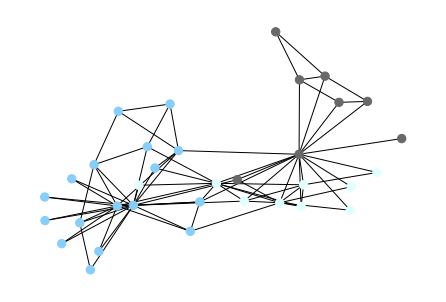

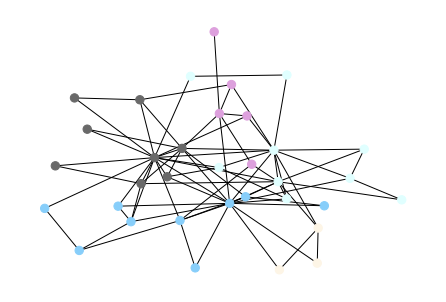

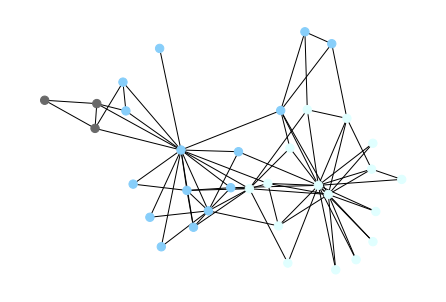

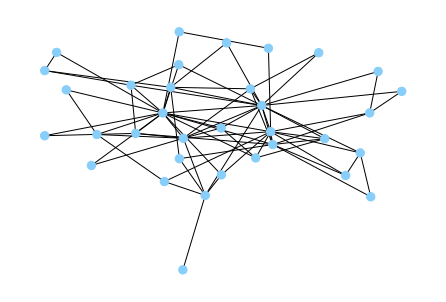

In [81]:
compare_communities(G_karate, G_karate_rnd)

##### dolphins

Number of communities by using greedy modularity maximization before randomisation: 4
Number of communities by using greedy modularity maximization after randomisation: 6
Number of communities by using label propagation algorithm before randomisation: 6
Number of communities by using label propagation algorithm after randomisation: 1


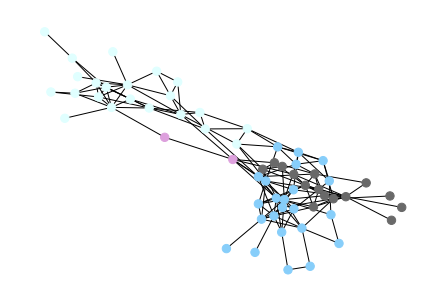

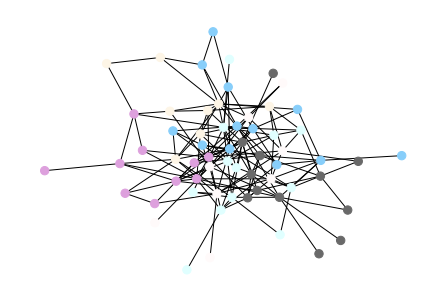

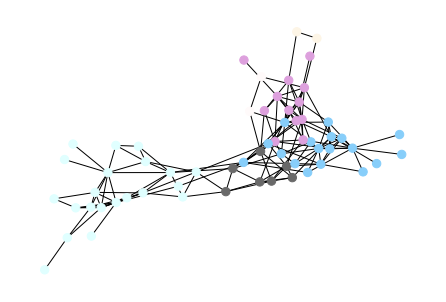

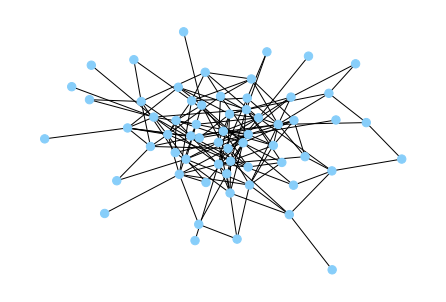

In [82]:
compare_communities(G_dolphins, G_dolphins_rnd)

##### Facebook

Number of communities by using greedy modularity maximization before randomisation: 13
Number of communities by using greedy modularity maximization after randomisation: 21
Number of communities by using label propagation algorithm before randomisation: 44
Number of communities by using label propagation algorithm after randomisation: 3


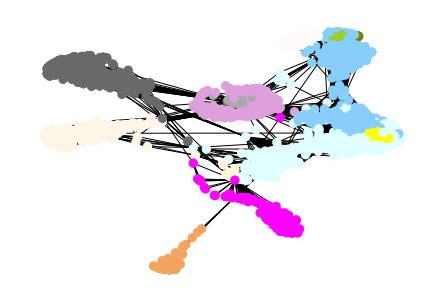

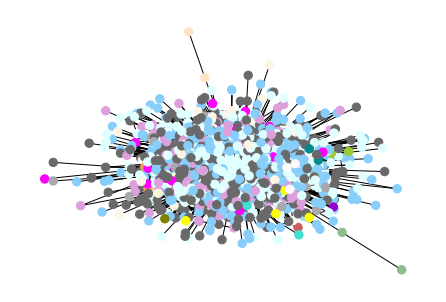

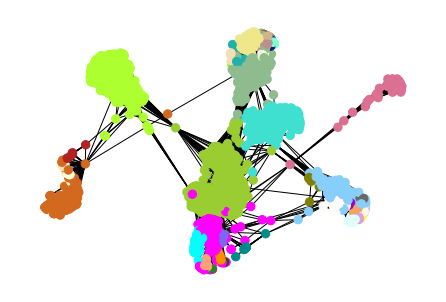

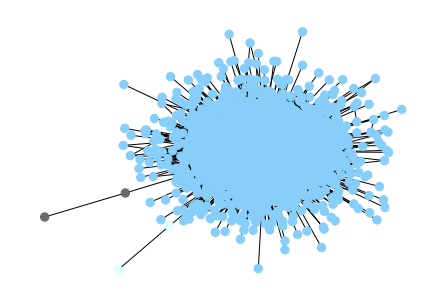

In [83]:
compare_communities(G_facebook, G_facebook_rnd)

#### A04.2 Task 1

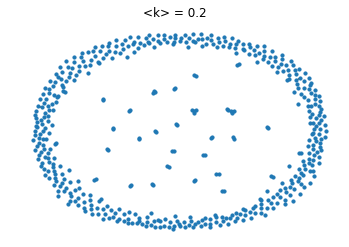

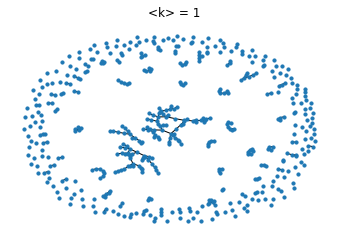

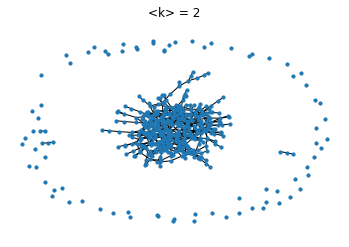

In [84]:
for avg_k in [0.2, 1 ,2]:
    new_fig()
    plt.title("<k> = " + str(avg_k))
    visualize_ER_graph(avg_k, 500)

#### A04.2_Task 2
(PS. log scale here cannot start from 0, so it starts from 10^-3)

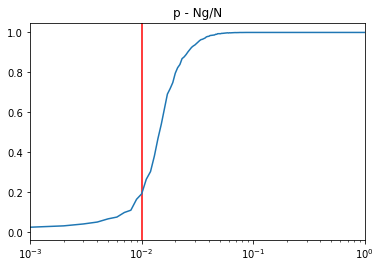

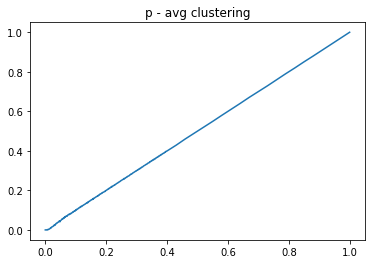

In [85]:
plot_p_NG_N(100)

#### A04.2 Task 2 - 2 Explanation
Clustering coefficient represents the possibility that two of the node's neighbors are linked.
ER is generated through the possibility of edge creation probability p.
So it means the possibility of any two nodes are connected is p.
Say a node with k degree, the clustering coefficient's expectation is 1/k(k-1)) * (k(k-1) * p) = p.
Note that k(k-1) * p is the number of edges between this node's neighbors on average, where k(k-1) is the amount of all possible edges.
So the average of clustering coefficients is just equal to p.

#### A04.3
(log scale cannot start from 0. )

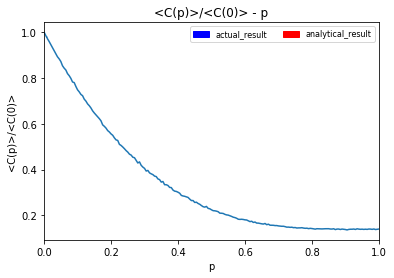

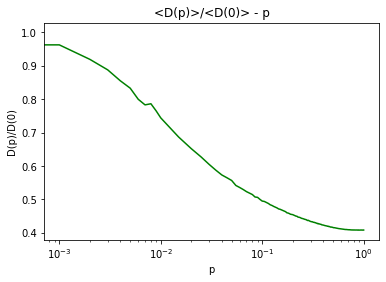

In [127]:
generate_ws()